In [9]:
#1.zadatak

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mtcars = pd.read_csv('../resources/mtcars.csv')

#5 auta s najvecom potrosnjom
mtcars_mpg = mtcars.sort_values("mpg", ascending = False)
print("5 auta s najvecom potrosnjom:\n")
print(mtcars_mpg[["car"]].head(5))
print("\n\n")

#auti s 8 cilindara koji imaju najmanju potrošnju
mtcars_cyl8 = mtcars[mtcars["cyl"] == 8]
mtcars_cyl8 = mtcars_cyl8.sort_values("mpg", ascending = True)
print("auti s 8 cilindara koji imaju najmanju potrosnju:\n")
print(mtcars_cyl8[["car"]].head(8))
print("\n\n")

#srednja potrosnja automobila sa 6 cilindara
mtcars_cyl6 = mtcars[mtcars["cyl"] == 6]
print("srednja potrosnja automobila sa 6 cilindara:\n")
print(mtcars_cyl6["mpg"].mean())
print("\n\n")

#srednja potrosnja automobila s 4 cilindra i tezinom izmedu 2000 i 2200 lbs
mtcars_cyl4 = mtcars[mtcars["cyl"] == 4]
mtcars_cyl4 = mtcars_cyl4[mtcars_cyl4["wt"] >= 2.0]
mtcars_cyl4 = mtcars_cyl4[mtcars_cyl4["wt"] <= 2.2]
print("srednja potrosnja automobila s 4 cilindra i tezinom izmedu 2000 i 2200 lbs:\n")
print(mtcars_cyl4["mpg"].mean())
print("\n\n")

#broj automobila s automatskim i rucnim mjenjacem
mtcars_a = mtcars[mtcars["am"] == 0]
mtcars_r = mtcars[mtcars["am"] == 1]
print("broj automobila s automatskim i rucnim mjenjacem:\n")
print(len(mtcars_a))
print(len(mtcars_r))
print("\n\n")

#broj automobila s automatskim mjenjacem i snagom preko 100 konja
mtcars_a = mtcars_a[mtcars_a["hp"] > 100]
print("broj automobila s automatskim mjenjacem preko 100 konja:\n")
print(len(mtcars_a))
print("\n\n")

#masa svakog automobila u kilogramima
mtcars_kg = mtcars.copy()
mtcars_kg["wt"] = mtcars_kg["wt"] * 0.45359 * 1000
print("masa svakog automobila u kilogramima\n")
print(mtcars_kg[["car", "wt"]])

5 auta s najvecom potrosnjom:

               car
19  Toyota Corolla
17        Fiat 128
27    Lotus Europa
18     Honda Civic
25       Fiat X1-9



auti s 8 cilindara koji imaju najmanju potrosnju:

                    car
14   Cadillac Fleetwood
15  Lincoln Continental
23           Camaro Z28
6            Duster 360
16    Chrysler Imperial
30        Maserati Bora
13          Merc 450SLC
22          AMC Javelin



srednja potrosnja automobila sa 6 cilindara:

19.74285714285714



srednja potrosnja automobila s 4 cilindra i tezinom izmedu 2000 i 2200 lbs:

29.2



broj automobila s automatskim i rucnim mjenjacem:

19
13



broj automobila s automatskim mjenjacem preko 100 konja:

16



masa svakog automobila u kilogramima

                    car          wt
0             Mazda RX4  1188.40580
1         Mazda RX4 Wag  1304.07125
2            Datsun 710  1052.32880
3        Hornet 4 Drive  1458.29185
4     Hornet Sportabout  1560.34960
5               Valiant  1569.42140
6            Dus

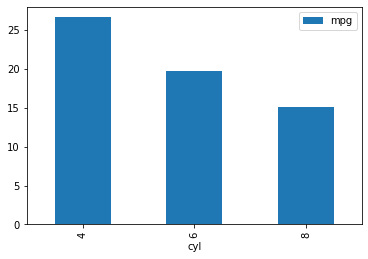

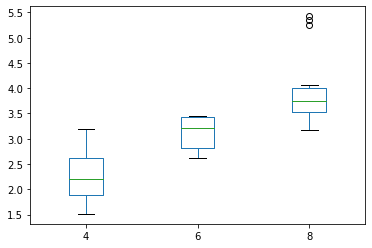

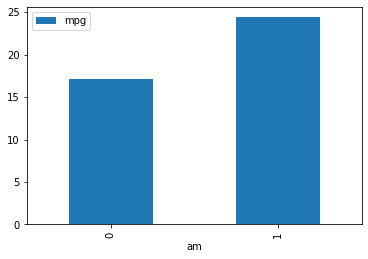

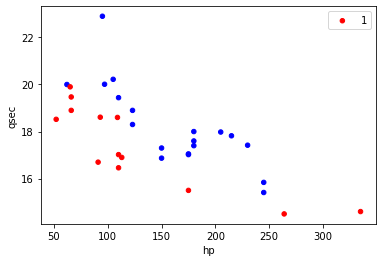

In [48]:
#2. zadatak

#prosječna potrosnja auta s 4, 6 i 8 cilindara uspoređena bar grafom
mtcars4 = mtcars[mtcars["cyl"] == 4]
mpg4 = mtcars4["mpg"].mean()

mtcars6 = mtcars[mtcars["cyl"] == 6]
mpg6 = mtcars6["mpg"].mean()

mtcars8 = mtcars[mtcars["cyl"] == 8]
mpg8 = mtcars8["mpg"].mean()

mpgDataCyl = {"cyl": [4, 6, 8], "mpg": [mpg4, mpg6, mpg8]}
mpgCyl = pd.DataFrame(mpgDataCyl, columns = ["cyl", "mpg"])
mpgCyl.plot.bar(x="cyl", y="mpg")

#Pomoću boxplot-a prikazane na istoj slici distribucije težine automobila s 4, 6 i 8 cilindara
wtData = {"4": mtcars4["wt"], "6": mtcars6["wt"], "8": mtcars8["wt"]}
wtCyl = pd.DataFrame(wtData, columns = ["4", "6", "8"])
wtCyl.plot.box()

#usporedba prosijecne potrosnje automobila s rucnim i automatskim mijenjacem
mtcarsA = mtcars[mtcars["am"] == 0]
mtcarsR = mtcars[mtcars["am"] == 1]

mpgA = mtcarsA["mpg"].mean()
mpgR = mtcarsR["mpg"].mean()

mpgDataAm = {"am": [0, 1], "mpg": [mpgA, mpgR]}
mpgAm = pd.DataFrame(mpgDataAm, columns = ["am", "mpg"])
mpgAm.plot.bar(x = "am", y = "mpg")

#odnos snage i ubrzanja
colors = np.where(mtcars["am"]==1,'r','b')
mtcars.plot.scatter(x="hp", y="qsec", c = colors)
plt.legend("1")

<ipython-input-35-46d2dc69ca7c>:19: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  obj = root.getchildren()[i].getchildren()


3 datuma kada je vrijednost bila najveca:

       vrijeme
21  2017-01-21
20  2017-01-20
29  2017-01-29


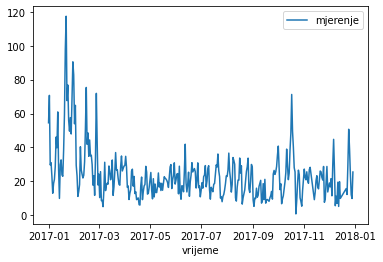

In [35]:
#3. zadatak

import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET

# url that contains valid xml file:
url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
while True:
    
    try:
        obj = root.getchildren()[i].getchildren()
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1

df.vrijeme = pd.to_datetime(df.vrijeme, utc=True).dt.date
df.plot(y='mjerenje', x='vrijeme')

# add date month and day designator
df['month'] = pd.DatetimeIndex(df.vrijeme).month
df['dayOfweek'] = pd.DatetimeIndex(df.vrijeme).dayofweek

#kada je koncentracija bila najveća
dfSorted = df.sort_values("mjerenje", ascending = False)
print("3 datuma kada je vrijednost bila najveca:\n")
print(dfSorted[["vrijeme"]].head(3))

